# **Chapter 1**

## Applying logistic regression and SVM
> In this chapter you will learn the basics of applying logistic regression and support vector machines (SVMs) to classification problems. You'll use the scikit-learn library to fit classification models to real data. This is the Summary of lecture "Linear Classifiers in Python", via datacamp.

## Scikit-learn refresher

### KNN classification
 this exercise you'll explore a subset of the [Large Movie Review Dataset](http://ai.stanford.edu/~amaas/data/sentiment/).The X variables contain features based on the words in the movie reviews, and the y variables contain labels for whether the review sentiment is positive (+1) or negative (-1).

> Large Movie Review Dataset : This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided. See the README file contained in the release for more details.




In [4]:
import numpy as np
from sklearn.datasets import load_svmlight_file

In [5]:
X_train, y_train = load_svmlight_file('./aclImdb/train/labeledBow.feat')
X_test, y_test = load_svmlight_file('./aclImdb/test/labeledBow.feat')

In [6]:
y_train[y_train < 5] = -1.0
y_train[y_train >= 5] = 1.0

y_test[y_test < 5] = -1.0
y_test[y_test >= 5] = 1.0

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train[:, :89523], y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
print("Prediction for test example 0:", pred)

## Applying logistic regression and SVM


### Running LogisticRegression and SVC
In this exercise, you'll apply logistic regression and a support vector machine to classify images of handwritten digits.



In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

1.0
0.9711111111111111
0.9970304380103935
0.9844444444444445


c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Sentiment analysis for movie reviews**

In this exercise you'll explore the probabilities outputted by logistic regression on a subset of the Large Movie Review Dataset.

The variables X and y are already loaded into the environment. X contains features based on the number of times words appear in the movie reviews, and y contains labels for whether the review sentiment is positive (+1) or negative (-1).

```python
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])
```

## Linear classifiers
- Classification: learning to predict categories
- decision boundary: the surface separating different predicted classes
- linear classifier: a classifier that learn linear decision boundaries
    - e.g. logistic regression, linear SVM
- linearly separable: a dataset can be perfectly explained by a linear classifier

### Visualizing decision boundaries
In this exercise, you'll visualize the decision boundaries of various classifier types.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#hide
X = np.array([[11.45,  2.4 ],
       [13.62,  4.95],
       [13.88,  1.89],
       [12.42,  2.55],
       [12.81,  2.31],
       [12.58,  1.29],
       [13.83,  1.57],
       [13.07,  1.5 ],
       [12.7 ,  3.55],
       [13.77,  1.9 ],
       [12.84,  2.96],
       [12.37,  1.63],
       [13.51,  1.8 ],
       [13.87,  1.9 ],
       [12.08,  1.39],
       [13.58,  1.66],
       [13.08,  3.9 ],
       [11.79,  2.13],
       [12.45,  3.03],
       [13.68,  1.83],
       [13.52,  3.17],
       [13.5 ,  3.12],
       [12.87,  4.61],
       [14.02,  1.68],
       [12.29,  3.17],
       [12.08,  1.13],
       [12.7 ,  3.87],
       [11.03,  1.51],
       [13.32,  3.24],
       [14.13,  4.1 ],
       [13.49,  1.66],
       [11.84,  2.89],
       [13.05,  2.05],
       [12.72,  1.81],
       [12.82,  3.37],
       [13.4 ,  4.6 ],
       [14.22,  3.99],
       [13.72,  1.43],
       [12.93,  2.81],
       [11.64,  2.06],
       [12.29,  1.61],
       [11.65,  1.67],
       [13.28,  1.64],
       [12.93,  3.8 ],
       [13.86,  1.35],
       [11.82,  1.72],
       [12.37,  1.17],
       [12.42,  1.61],
       [13.9 ,  1.68],
       [14.16,  2.51]])

y = np.array([ True,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True])

In [10]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns
    -------
        xx, yy : ndarray
    """
    
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [11]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

In [12]:
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
        
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, 
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, 
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\975142573.py:17: SyntaxWarning: invalid escape sequence '\D'
  cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)


In [13]:
def plot_4_classifiers(X, y, clfs):
    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    
    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)

c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\975142573.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\975142573.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,
C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\975142573.py:22: UserWarnin

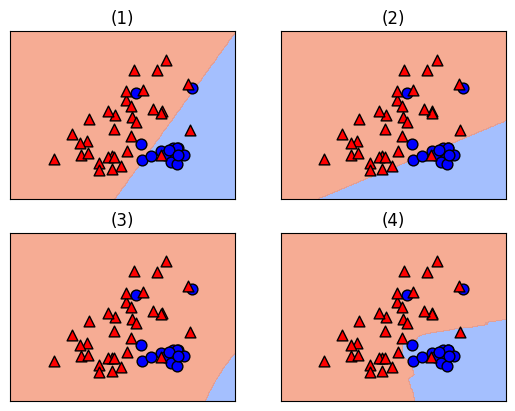

In [15]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)
    
# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.savefig('plot_4_classifiers.png')

# **Chapter 2**

## Loss functions
> In this chapter you will discover the conceptual framework behind logistic regression and SVMs. This will let you delve deeper into the inner workings of these models. This is the Summary of lecture "Linear Classifiers in Python", via datacamp.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear classifiers - the coefficients
- Dot Products
    - `x@y` is called the dot product of `x` and `y`, and is written $x \cdot y$
- Linear Classifier predictions
    - raw model output = coefficients $\cdot$ features + intercept
    - Linear classifier prediction: compute raw model output, check the sign
        - if positive, predict one class
        - if negative, predict the other class
    - This is the same for logistic regression and linear SVM
        - `fit` is different but `predict` is the same

### Changing the model coefficients
When you call `fit` with scikit-learn, the logistic regression coefficients are automatically learned from your dataset. In this exercise you will explore how the decision boundary is represented by the coefficients. To do so, you will change the coefficients manually (instead of with `fit`), and visualize the resulting classifiers.

In [17]:
#hide
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])

y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

In [18]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns
    -------
        xx, yy : ndarray
    """
    
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
        
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, 
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, 
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

<>:63: SyntaxWarning: invalid escape sequence '\D'
<>:63: SyntaxWarning: invalid escape sequence '\D'
C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\3513585600.py:63: SyntaxWarning: invalid escape sequence '\D'
  cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

with errors

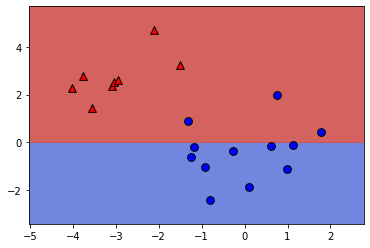

Number of errors: 3


In [ ]:
# Set the coefficients
model.coef_ = np.array([[0,1]])
model.intercept_ = np.array([0])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

without errors

C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\3513585600.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\3513585600.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


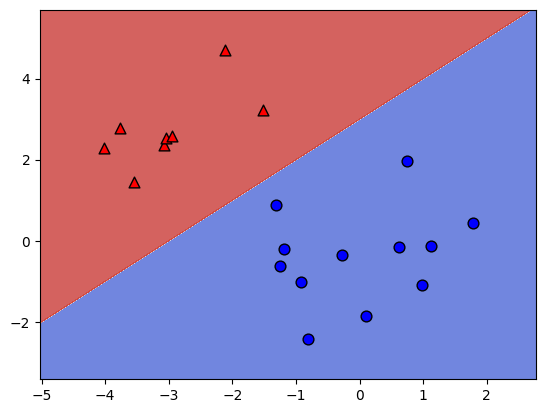

Number of errors: 0


In [20]:
# Set the coefficients
model.coef_ = np.array([[-1,1]])
model.intercept_ = np.array([-3])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

## What is a loss function?
- Least squares: the squared loss
    - scikit-learn's `LinearRegression` minimizes a loss:
    $$ \sum_{i=1}^{n}(\text{true ith target value - predicted ith target value})^2 $$
    - Minimization is with respect to coefficients or parameters of the model.
- Classification errors: the 0-1 loss
    - Squared loss not appropriate for classification problems
    - A natrual loss for classification problem is the number of errors
    - This is the **0-1 loss**: it's 0 for a correct prediction and 1 for an incorrect prediction
    - But this loss is hard to minimize

### Minimizing a loss function
In this exercise you'll implement linear regression "from scratch" using `scipy.optimize.minimize`.

We'll train a model on the Boston housing price data set.

In [21]:
X = pd.read_csv('boston_X.csv').to_numpy()
y = pd.read_csv('boston_y.csv').to_numpy()

In [22]:
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# The squared error, summed overt training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred) ** 2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X, y)
print(lr.coef_)

[-9.16299821e-02  4.86754487e-02 -3.77639695e-03  2.85635666e+00
 -2.88069820e+00  5.92521888e+00 -7.22455458e-03 -9.67993692e-01
  1.70448535e-01 -9.38967901e-03 -3.92422282e-01  1.49830711e-02
 -4.16972458e-01]
[[-9.16297843e-02  4.86751203e-02 -3.77930006e-03  2.85636751e+00
  -2.88077933e+00  5.92521432e+00 -7.22447929e-03 -9.67995240e-01
   1.70443393e-01 -9.38925373e-03 -3.92425680e-01  1.49832102e-02
  -4.16972624e-01]]


## Loss function diagrams

### Comparing the logistic and hinge losses
In this exercise you'll create a plot of the logistic and hinge losses using their mathematical expressions, which are provided to you.

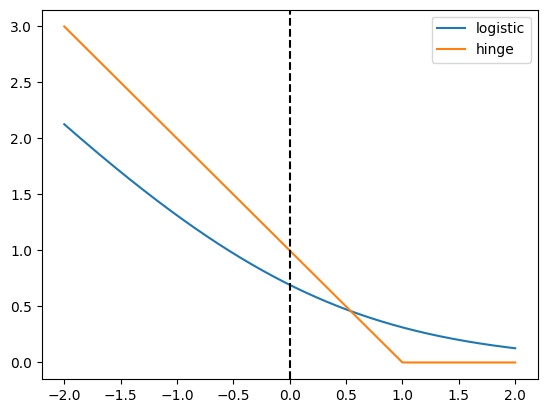

In [24]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
    return np.log(1 + np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
    return np.maximum(0, 1 - raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic');
plt.plot(grid, hinge_loss(grid), label='hinge');
plt.axvline(x=0, linestyle='dashed', color='k')
plt.legend();
plt.show()

### Implementing logistic regression
This is very similar to the earlier exercise where you implemented linear regression "from scratch" using `scipy.optimize.minimize`. However, this time we'll minimize the logistic loss and compare with scikit-learn's `LogisticRegression`.

The `log_loss()` function from the previous exercise is already defined in your environment, and the sklearn breast cancer prediction dataset (first 10 features, standardized) is loaded into the variables `X` and `y`.

In [25]:
X = pd.read_csv('breast_X.csv').to_numpy()
y = pd.read_csv('breast_y.csv').to_numpy()

In [26]:
# logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X, y)
print(lr.coef_)

[ 1.03607194 -1.65378471  4.08316467 -9.40924011 -1.06786722  0.07892863
 -0.85110337 -2.44102856 -0.45285651  0.43353569]
[[ 1.03665946 -1.65380077  4.08233062 -9.40904867 -1.06787935  0.07901598
  -0.85099843 -2.44107473 -0.45288928  0.43348202]]


c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


As you can see, logistic regression is just minimizing the loss function we've been looking at. 

# **Chapter 3**

## Logistic regression
> In this chapter you will delve into the details of logistic regression. You'll learn all about regularization and how to interpret model output. This is the Summary of lecture "Linear Classifiers in Python", via datacamp.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

In [28]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns
    -------
        xx, yy : ndarray
    """
    
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
        
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, 
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, 
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

<>:63: SyntaxWarning: invalid escape sequence '\D'
<>:63: SyntaxWarning: invalid escape sequence '\D'
C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\3513585600.py:63: SyntaxWarning: invalid escape sequence '\D'
  cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)


## Logistic regression and regularization
- Regularized logistic regression
    - Hyperparameter "C" is the inverse of the regularization strength
        - Larger "C": less regularization
        - Smaller "C": more regularization
    - regularized loss = original loss + large coefficient penalty
        - more regularization: lower training accuracy
        - more regularization: (almost always) higher test accuracy
- L1 vs. L2 regularization
    - Lasso = linear regression with L1 regularization
    - Ridge = linear regression with L2 regularization
   

### Regularized logistic regression
In Chapter 1, you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization. The handwritten digits dataset is already loaded, split, and stored in the variables X_train, y_train, X_valid, and y_valid. The variables train_errs and valid_errs are already initialized as empty lists.



In [29]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

digits = load_digits()

X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)

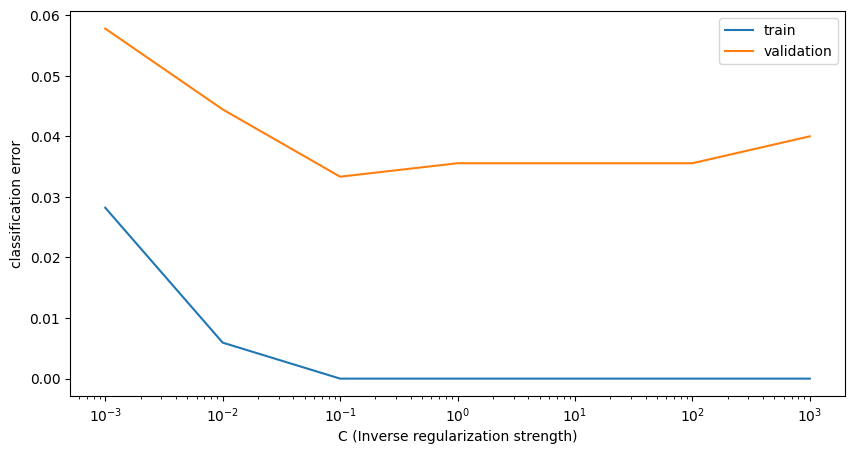

In [30]:
# Train and validation errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value, max_iter=10000)
    lr.fit(X_train, y_train)
    
    # Evalueate error rates and append to lists
    train_errs.append(1.0 - lr.score(X_train, y_train))
    valid_errs.append(1.0 - lr.score(X_valid, y_valid))
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs);
plt.ylabel('classification error')
plt.xlabel('C (Inverse regularization strength)')
plt.legend(("train", "validation"));

### Logistic regression and feature selection
In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in `X_train` and `y_train`.

We'll search for the best value of C using scikit-learn's `GridSearchCV()`, which was covered in the prerequisite course.

In [31]:
from sklearn.datasets import load_svmlight_file

X_train, y_train = load_svmlight_file('./aclImdb/train/labeledBow.feat')
y_train[y_train < 5] = -1.0
y_train[y_train >= 5] = 1.0

In [32]:
from sklearn.model_selection import GridSearchCV

# Specify L1 regularization
lr = LogisticRegression(penalty='l1', solver='liblinear')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (select features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 0.1}
Total number of features: 89527
Number of selected features: 1106


### Identifying the most positive and negative words
In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable `lr`.

In addition, the words corresponding to the different features are loaded into the variable `vocab`. For example, since `vocab[100]` is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

In [34]:
vocab = pd.read_csv('vocab.csv').to_numpy()

In [35]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(best_lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

In [38]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

Most positive words: ['great'], ['excellent'], ['best'], ['wonderful'], ['perfect'], 

Most negative words: ['bad'], ['worst'], ['waste'], ['awful'], ['boring'], 



## Logistic regression and probabilities
- Regularization is supposed to combat overfitting, and there is a connection between overconfidence and overfitting
- How are these probabilities computed?
    - logistic regression predictions: sign of raw model output
    - logistic regression probabilities: "squashed" raw model output

### Regularization and probabilities
In this exercise, you will observe the effects of changing the regularization strength on the predicted probabilities.

In [39]:
X = pd.read_csv('binary_X.csv').to_numpy()
y = pd.read_csv('binary_y.csv').to_numpy().ravel()

C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\3513585600.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\3513585600.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


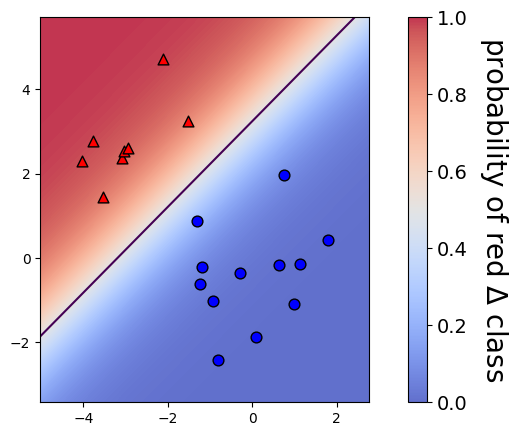

Maximum predicted probability 0.9973143426900802


In [40]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X, y)
plot_classifier(X, y, model, proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\3513585600.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\3513585600.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


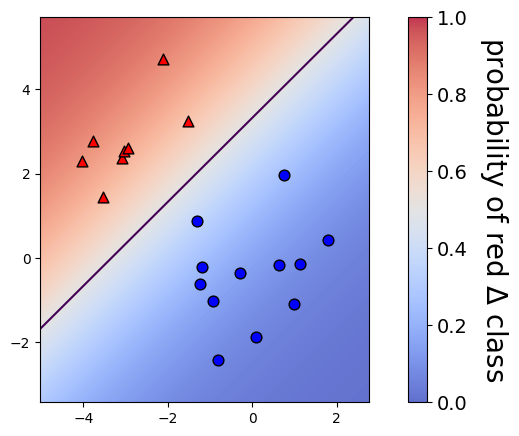

Maximum predicted probabilty 0.9352061680350907


In [41]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X, y)
plot_classifier(X, y, model, proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probabilty", np.max(prob))

As you probably noticed, smaller values of `C` lead to less confident predictions. That's because smaller `C` means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function. That's quite a chain of events!

### Visualizing easy and difficult examples
In this exercise, you'll visualize the examples that the logistic regression model is most and least confident about by looking at the largest and smallest predicted probabilities.

In [42]:
def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', 
               vmin = 0, vmax = 16, interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title("class label = %d" % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_prob = lr.predict_proba(X[i][None])[0,pred]
        plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
        plt.show()

In [43]:
X, y = digits.data, digits.target

C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\2407326374.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))


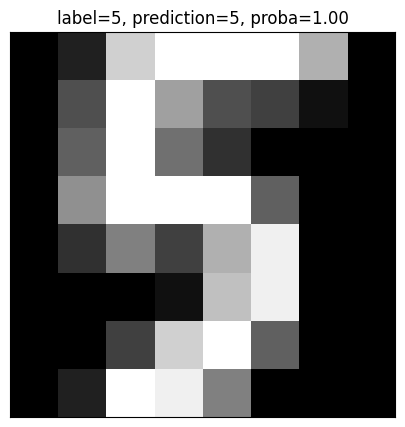

C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\2407326374.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))


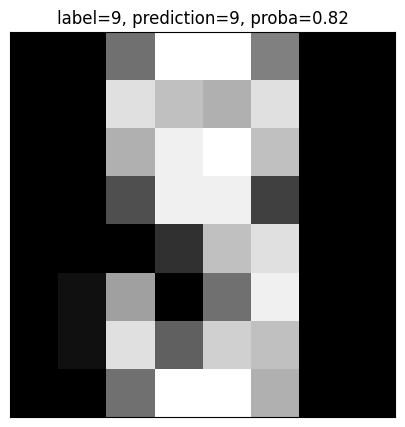

In [62]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X, y)

# Get predicted probabilties
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probabilty
proba_inds = np.argsort(np.max(proba, axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

## Multi-class logistic regression
- One-vs-rest:
    - fit a binary classifier for each class
    - predict with all, take largest output
    - pro: simple, modular
    - con: not directly optimizing accuracy
    - common for SVMs as well
- "Multinomial" or "Softmax":
    - fit a single classifier for all classes
    - prediction directly outputs best class
    - pro: tackle the problem directly
    - con: more complicated, new code
    - possible for SVMs, but less common

### Fitting multi-class logistic regression
In this exercise, you'll fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial, on the handwritten digits data set and compare the results. 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [63]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(max_iter=10000)
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy:", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
lr_mn.fit(X_train, y_train)
print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy:", lr_mn.score(X_test, y_test))

OVR training accuracy: 1.0
OVR test accuracy: 0.9644444444444444
Softmax training accuracy: 1.0
Softmax test accuracy: 0.9644444444444444


### Visualizing multi-class logistic regression
In this exercise we'll continue with the two types of multi-class logistic regression, but on a toy 2D data set specifically designed to break the one-vs-rest scheme.



In [67]:
X_train = pd.read_csv('toy_X_train.csv').to_numpy()
y_train = pd.read_csv('toy_y_train.csv').to_numpy().ravel()

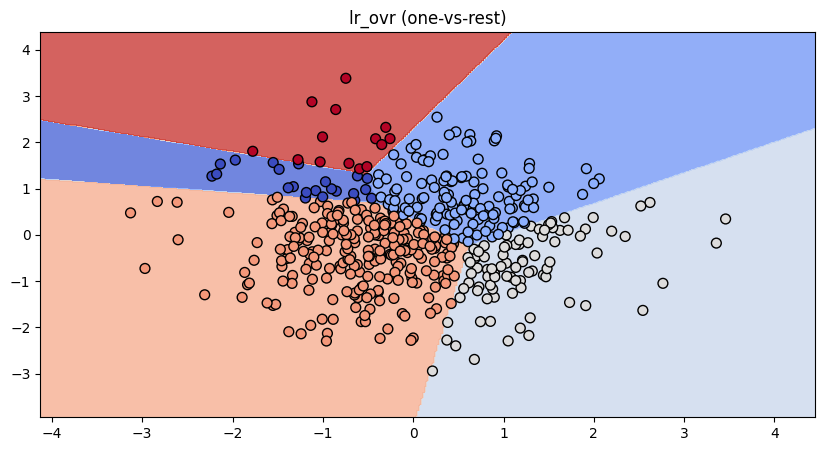

In [68]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(max_iter=10000, C=100)
lr_ovr.fit(X_train, y_train)

fig, ax = plt.subplots();
ax.set_title("lr_ovr (one-vs-rest)");
plot_classifier(X_train, y_train, lr_ovr, ax=ax);

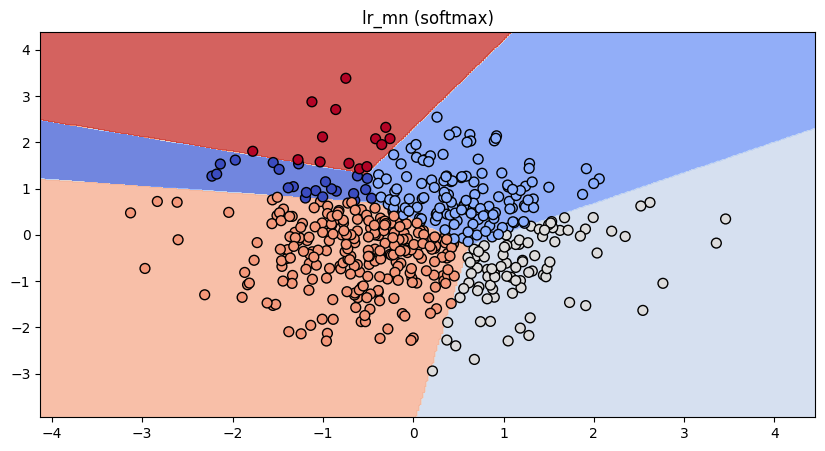

In [69]:
# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
lr_mn.fit(X_train, y_train)

fig, ax = plt.subplots();
ax.set_title("lr_mn (softmax)");
plot_classifier(X_train, y_train, lr_ovr, ax=ax);

Softmax training accuracy: 0.952
One-vs-rest training accuracy: 0.996


C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\3513585600.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\3513585600.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


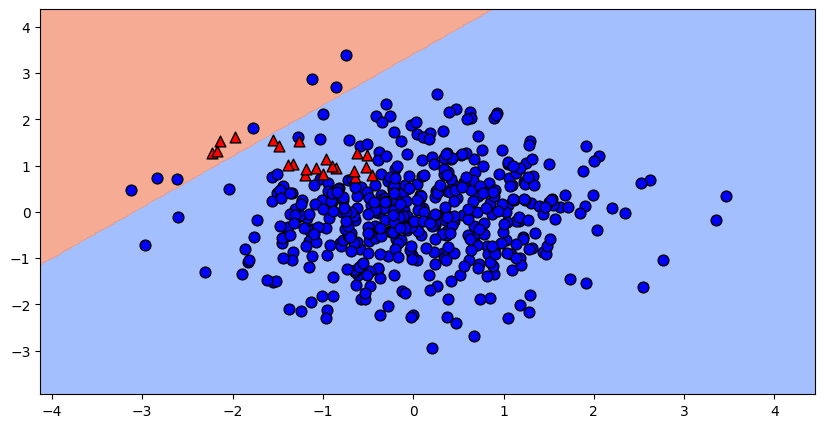

In [70]:
# Print training accuracies
print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(max_iter=10000, C=100)
lr_class_1.fit(X_train, y_train == 1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train == 1, lr_class_1);

As you can see, the binary classifier incorrectly labels almost all points in class 1 (shown as red triangles in the final plot)! Thus, this classifier is not a very effective component of the one-vs-rest classifier. In general, though, one-vs-rest often works well.

### One-vs-rest SVM
As motivation for the next and final chapter on support vector machines, we'll repeat the previous exercise with a non-linear SVM. Once again, the data is loaded into X_train, y_train, X_test, and y_test .

Instead of using `LinearSVC`, we'll now use scikit-learn's `SVC` object, which is a non-linear "kernel" SVM. Again, your task is to create a plot of the binary classifier for class 1 vs. rest.

In [71]:
X_test = pd.read_csv('toy_X_test.csv').to_numpy()
y_test = pd.read_csv('toy_y_test.csv').to_numpy().ravel()

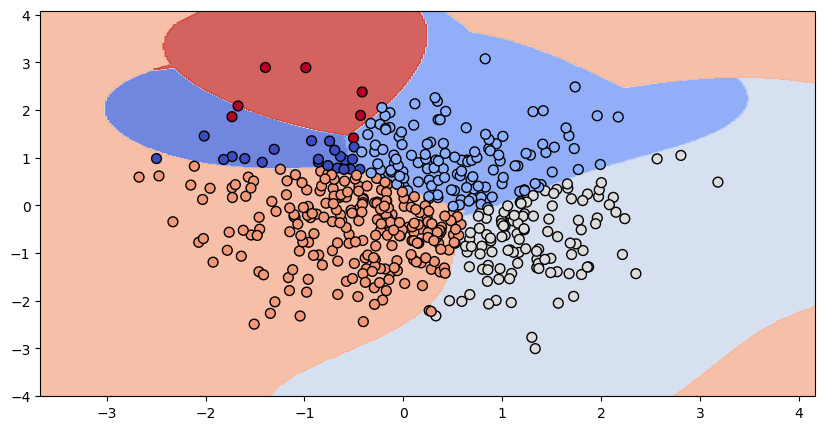

In [76]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train)
plot_classifier(X_test, y_test, svm_class_1)

C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\3513585600.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\3513585600.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


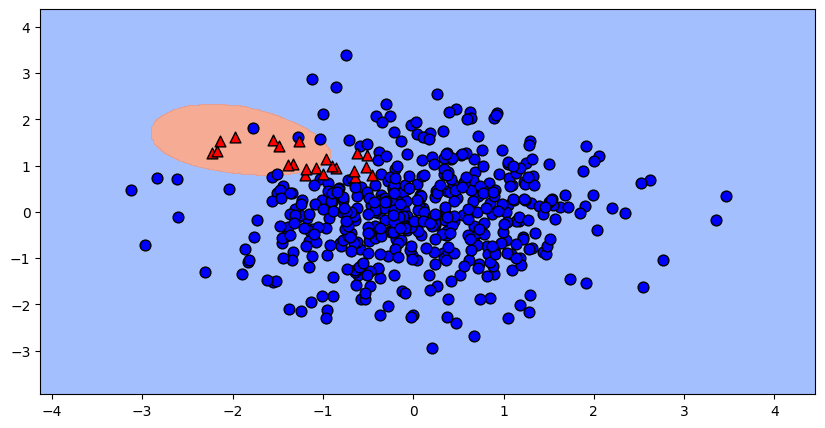

In [77]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1)

C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\3513585600.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\3513585600.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


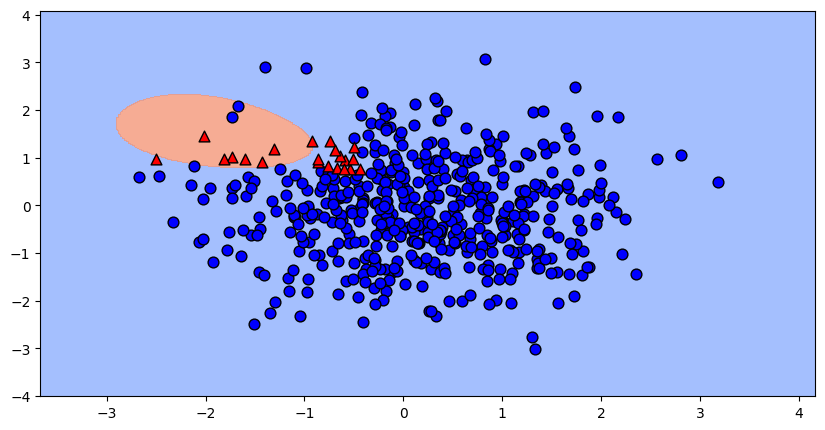

In [75]:
# Create/plot the binary classifier
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train == 1)
plot_classifier(X_test, y_test == 1, svm_class_1)

The non-linear SVM works fine with one-vs-rest on this dataset because it learns to "surround" class 1.

# **Chapter 4**

## Support Vector Machines
> In this chapter you will learn all about the details of support vector machines. You'll learn about tuning hyperparameters for these models and using kernels to fit non-linear decision boundaries. This is the Summary of lecture "Linear Classifiers in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: images/svm_classification2.png

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

In [80]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns
    -------
        xx, yy : ndarray
    """
    
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
        
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, 
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, 
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

<>:63: SyntaxWarning: invalid escape sequence '\D'
<>:63: SyntaxWarning: invalid escape sequence '\D'
C:\Users\yeiso\AppData\Local\Temp\ipykernel_28616\3513585600.py:63: SyntaxWarning: invalid escape sequence '\D'
  cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)


## Support Vectors
- Support Vector Machine (SVM)
    - Linear Classifier
    - Trained using the hinge loss and L2 regularization
- Support vector
    - A training example **not** in the flat part of the loss diagram
    - An example that is incorrectly classified **or** close to the boundary
    - If an example is not a support vector, removing it has no effect on the model
    - Having a small number of support vectors makes kernel SVMs really fast
- Max-margin viewpoint
    - The SVM maximizes the "margin" for linearly separable datasets
    - Margin: distance from the boundary to the closest points

### Effect of removing examples
Support vectors are defined as training examples that influence the decision boundary. In this exercise, you'll observe this behavior by removing non support vectors from the training set.

In [81]:
X = pd.read_csv('wine_X.csv').to_numpy()
y = pd.read_csv('wine_y.csv').to_numpy().ravel()

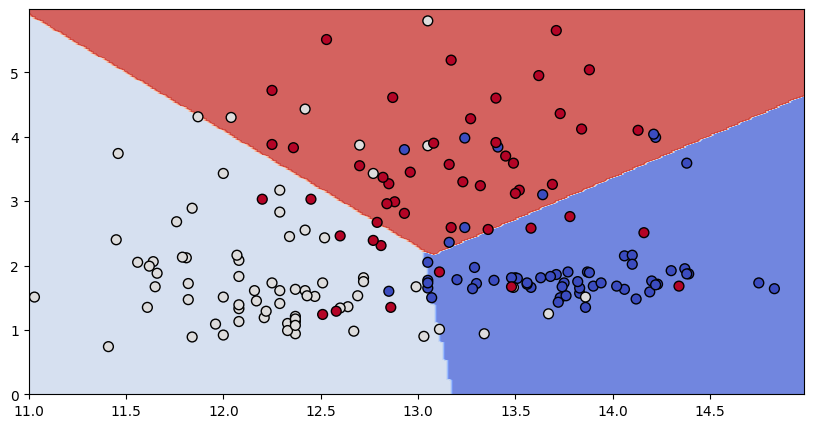

Number of original examples 178
Number of support vectors 81


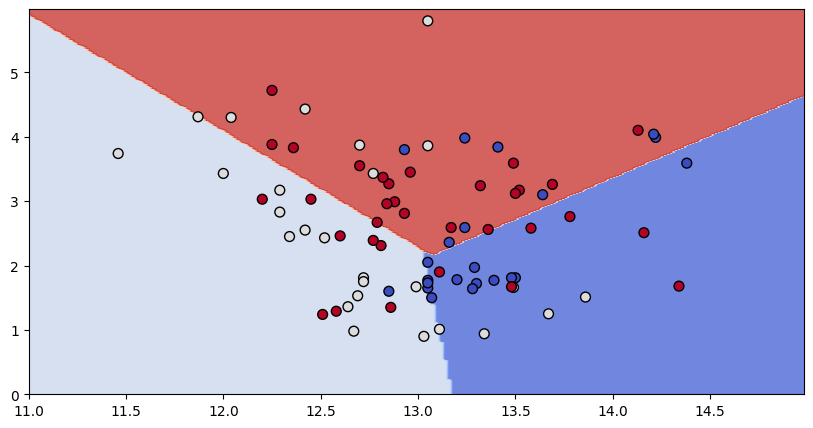

In [82]:
from sklearn.svm import SVC

# Train a linear SVM
svm = SVC(kernel='linear')
svm.fit(X, y)
plot_classifier(X, y, svm, lims=(11, 15, 0, 6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel='linear')
svm_small.fit(X, y)
plot_classifier(X_small, y_small, svm_small, lims=(11, 15, 0, 6))

Compare the decision boundaries of the two trained models: are they the same? By the definition of support vectors, they should be!

## Kernel SVMs


### GridSearchCV warm-up
In the video we saw that increasing the RBF kernel hyperparameter `gamma` increases training accuracy. In this exercise we'll search for the `gamma` that maximizes cross-validation accuracy using scikit-learn's `GridSearchCV`. A binary version of the handwritten digits dataset, in which you're just trying to predict whether or not an image is a "2", is already loaded into the variables X and y.

In [83]:
X = pd.read_csv('digits_2_X.csv').to_numpy()
y = pd.read_csv('digits_2_y.csv').astype('bool').to_numpy().ravel()

In [84]:
from sklearn.model_selection import GridSearchCV

# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and runt the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, param_grid=parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 0.001}


 Larger values of `gamma` are better for training accuracy, but cross-validation helped us find something different (and better!).

### Jointly tuning gamma and C with GridSearchCV
In the previous exercise the best value of `gamma` was 0.001 using the default value of `C`, which is 1. In this exercise you'll search for the best combination of `C` and `gamma` using `GridSearchCV`.

As in the previous exercise, the 2-vs-not-2 digits dataset is already loaded, but this time it's split into the variables `X_train`, `y_train`, `X_test`, and `y_test`. Even though cross-validation already splits the training set into parts, it's often a good idea to hold out a separate test set to make sure the cross-validation results are sensible.

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [86]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, param_grid=parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 1, 'gamma': 0.001}
Best CV accuracy 1.0
Test accuracy of best grid search hypers: 1.0


## Comparing logistic regression and SVM (and beyond)
- Logistic regression:
    - Is a linear classifier
    - Can use with kernels, but slow
    - Outputs meaningful probabilities
    - Can be extended to multi-class
    - All data points affect fit
    - L2 or L1 regularization
- Support Vector Machine (SVM)
    - Is a linear classifier
    - Can use with kernels, and fast
    - Does not naturally output probabilities
    - Can be extended to multi-class
    - Only "support vectors" affect fit
    - Conventionally just L2 regularization

### Using SGDClassifier
In this final coding exercise, you'll do a hyperparameter search over the regularization type, regularization strength, and the loss (logistic regression vs. linear SVM) using `SGDClassifier()`.

In [87]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [88]:
from sklearn.linear_model import SGDClassifier

# We set random_state=0 for reproducibility
linear_classifier = SGDClassifier(random_state=0, max_iter=10000)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 'loss':['hinge', 'log'],
              'penalty':['l1', 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuacy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l1'}
Best CV accuracy 0.9621171918186843
Test accuacy of best grid search hypers: 0.9577777777777777


c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base